# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [18]:
data = pd.read_csv('Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [23]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'Africa':1,'North America':2,'Asia':3,'Europe':4,
                                                         'Oceania':5,'Antarctica':6,'South America':7,
                                                         'Seven seas (open ocean)':8})
                                                
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,4
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,3
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


In [22]:
y = list(data['continent'])
y

['North America',
 'Asia',
 'Africa',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'Asia',
 'South America',
 'Asia',
 'Oceania',
 'Antarctica',
 'Oceania',
 'Seven seas (open ocean)',
 'North America',
 'Oceania',
 'Europe',
 'Asia',
 'Africa',
 'Europe',
 'Africa',
 'Africa',
 'Asia',
 'Europe',
 'Asia',
 'North America',
 'North America',
 'Europe',
 'North America',
 'Europe',
 'North America',
 'North America',
 'South America',
 'South America',
 'North America',
 'Asia',
 'Asia',
 'Africa',
 'Africa',
 'Europe',
 'South America',
 'Asia',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Oceania',
 'South America',
 'Africa',
 'Africa',
 'North America',
 'North America',
 'North America',
 'North America',
 'Asia',
 'Asia',
 'Europe',
 'Europe',
 'Africa',
 'North America',
 'Europe',
 'North America',
 'Africa',
 'South America',
 'Africa',
 'Africa',
 'Europe',
 'Europe',
 'Africa',
 'Europe',
 'Oceania',
 'South America',
 'Europe',
 'Europe',
 'Oceania',
 'Africa',
 'Eur


## Select the features

In [24]:
x = data_mapped.iloc[:,3:4]
x

,continent
0,2
1,3
2,1
3,2
4,4
...,...
236,5
237,3
238,1
239,1


## Clustering

Use 4 clusters initially.

In [30]:
kmeans = KMeans(7)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [31]:
identified = kmeans.fit_predict(x)

In [32]:
data_with_cluster = data_mapped.copy()
data_with_cluster['Cluster'] = identified
data_with_cluster

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,2,0
1,Afghanistan,66.004734,33.835231,3,4
2,Angola,17.537368,-12.293361,1,3
3,Anguilla,-63.064989,18.223959,2,0
4,Albania,20.049834,41.142450,4,2
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,5
237,Yemen,47.586762,15.909280,3,4
238,South Africa,25.083901,-29.000341,1,3
239,Zambia,27.774759,-13.458242,1,3


## Plot the data

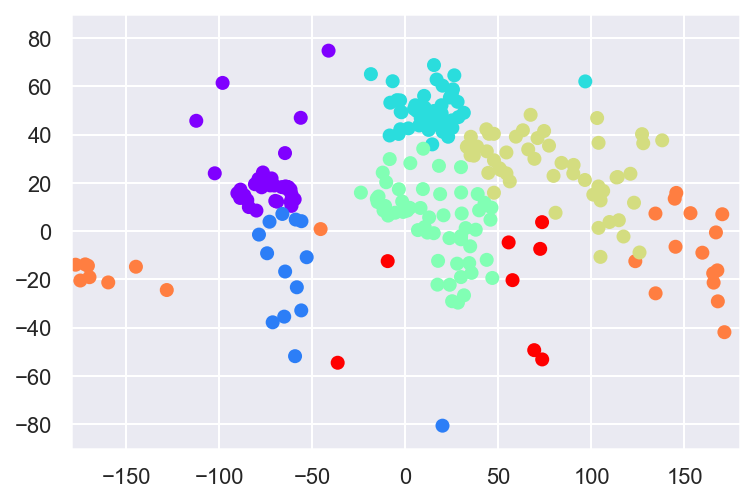

In [33]:
plt.scatter(data['Longitude'],data['Latitude'],c = data_with_cluster['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.